In [1]:
import pandas as pd
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
import time,os
from nrclex import NRCLex
import nltk
nltk.download('punkt')
import json
from textblob import TextBlob
import subprocess

[nltk_data] Downloading package punkt to /home/cm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [52]:
output=subprocess.check_output(['trans','-b',Text])
print(output.decode('utf-8').strip())

I am sad


In [64]:
analyzer=TextBlob("i am happy")
analyzer.detect_language()

'en'

In [ ]:

pos_count = 0
pos_correct = 0

with open("positive.txt","r") as f:
    for line in f.read().split('\n'):
        analysis = TextBlob(line)

        if analysis.sentiment.polarity >= 0.5:
            if analysis.sentiment.polarity > 0:
                pos_correct += 1
            pos_count +=1


neg_count = 0
neg_correct = 0

with open("negative.txt","r") as f:
    for line in f.read().split('\n'):
        analysis = TextBlob(line)
        if analysis.sentiment.polarity <= -0.5:
            if analysis.sentiment.polarity <= 0:
                neg_correct += 1
            neg_count +=1

print("Positive accuracy = {}% via {} samples".format(pos_correct/pos_count*100.0, pos_count))
print("Negative accuracy = {}% via {} samples".format(neg_correct/neg_count*100.0, neg_count))

In [2]:
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from unidecode import unidecode
import time

sentList=[]
sentScore=0.0
#consumer key, consumer secret, access token, access secret.
ckey="MUceAzyDsRhUVxslw5HYUOJi3"
csecret="ewU3Gt9wfVIbrWJb9S50HNEZTes4zrBL25gHP63e5p5OBXwblp"
atoken="3226158368-EfFWoxTfYDMUPr2ysUBqBrYRj5NA5GrPoomfELt"
asecret="CtSnadmuL6eKBr4Xvtslix8SO4ZF26naSf6a9jahngyG2"

class listener(StreamListener):

    def on_data(self, data):
        global sentScore
        global sentList
        try:
            data = json.loads(data)
            tweet = unidecode(data['text'])
            time = int(data['timestamp_ms'])//1000
            
            analysis = TextBlob(tweet)
            
            if analysis.detect_language()!='en':
                output=subprocess.check_output(['trans','-b',tweet])
                tweet=output.decode('utf-8').strip()
                analysis = TextBlob(tweet)
            
            #if analysis.sentiment.polarity >= 0.5:
            if analysis.sentiment.polarity > 0:
                sentScore += 1
            
            #if analysis.sentiment.polarity <= -0.5:
            if analysis.sentiment.polarity <= 0:
                sentScore -= (1*0.3)
            sentList.append(sentScore)
            
            print(time, tweet, analysis.sentiment.polarity)
            

        except KeyError as e:
            print(str(e))
        return(True)

    def on_error(self, status):
        print(status)


while True:

    try:
        auth = OAuthHandler(ckey, csecret)
        auth.set_access_token(atoken, asecret)
        twitterStream = Stream(auth, listener())
        twitterStream.filter(track=["reliance","hdfc","infosys",
                                    "icici","tcs","tata consultancy services ltd",
                                    "kotak","kotak mahindra","hindustan unilever",
                                    "axis bank","l&t","larsen and toubro",
                                    "larsen & toubro","bajaj finance","airtel ltd",
                                    "asian paints","hcl","maruti",
                                    "maruti suzuki","mahindra","ultratech",
                                    "sun pharmaceutical","wipro","indusind",
                                    "titan watches","nestle","tata motors",
                                    "tech mahindra","power grid corporation","tata steel",
                                    "bajaj auto","adani port",
                                    "grasim","hero motocorp","ongc",
                                    "cipla","britannia","jsw steel",
                                    "bpc","bharat petroleum","eicher motors",
                                    "shree cement","sbi","state bank of india",
                                    "coal india","upl","gail india","indian oil corporation"])
#         twitterStream.filter(track=["stockmarket","sharebajar","share bajar","share bazar","sharebazar"],languages="hi")
    except Exception as e:
        print(str(e))
        time.sleep(5)

1617214451 @AxisBankSupport Hats off to Axis bank senior management and MD who all believe in ignorance rather than control an... https://t.co/yxPPeNTMeA 0.0
1617214453 RT @MilkybarUKI:  WIN a Year's Supply of Milkybar(r) Treats 

To ENTER: 
 LIKE this tweet
 FOLLOW @MilkybarUKI 
 RETWEET this tweet and... 0.8
1617214453 RT @Daily_Express: Tesco, Asda and Sainsbury's extend a food recall as baby food could contain plastic - more batches have been added https... 0.5
1617214454 RT @bsksrivastava: 10 years CAGR (%):

1. Alkyl Amine 53.59
2. Paushak 60.47
3. Astral Poly 58.42
4. Deepak Nitrite 56.50
5. Bajaj Finance ... 0.0
1617214461 RT @ANI: Cost of Domestic LPG cylinder to reduce by Rs 10 per cylinder effective 1st April 2021: Indian Oil Corporation Limited https://t.c... 0.1761904761904762
1617214465 https://t.co/EcbZjoLWAo 0.0
1617214465 RT @ANI: Cost of Domestic LPG cylinder to reduce by Rs 10 per cylinder effective 1st April 2021: Indian Oil Corporation Limited https://t.c... 0.1761

KeyboardInterrupt: 

In [3]:
len(sentList)

93

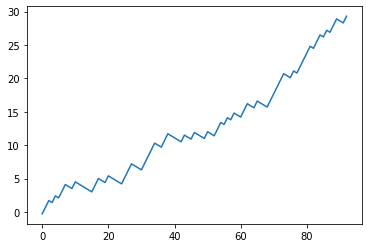

In [4]:
import matplotlib.pyplot as plt
plt.plot(sentList)